In [1]:
'''
We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?
'''

"\nWe'll be answering the following questions along the way:\n\n1.) What was the change in price of the stock over time?\n2.) What was the daily return of the stock on average?\n3.) What was the moving average of the various stocks?\n4.) What was the correlation between different stocks' closing prices?\n4.) What was the correlation between different stocks' daily returns?\n5.) How much value do we put at risk by investing in a particular stock?\n6.) How can we attempt to predict future stock behavior?\n"

In [67]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [69]:
from pandas_datareader import DataReader

In [70]:
from datetime import datetime

In [14]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [15]:
#pocetak godinu dana pre danas, kraj danas
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [17]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [18]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-09,201.509995,198.809998,199.199997,201.240005,20578000.0,198.866638
2019-07-10,203.729996,201.559998,201.850006,203.229996,17897100.0,200.833160
2019-07-11,204.389999,201.710007,203.309998,201.750000,20191800.0,199.370621
2019-07-12,204.000000,202.199997,202.449997,203.300003,17595200.0,200.902344
2019-07-15,205.869995,204.000000,204.089996,205.210007,16947400.0,202.789810
...,...,...,...,...,...,...
2020-07-01,367.359985,363.910004,365.119995,364.109985,27684300.0,364.109985
2020-07-02,370.470001,363.640015,367.850006,364.109985,28510400.0,364.109985
2020-07-06,375.779999,369.869995,370.000000,373.850006,29663900.0,373.850006


In [19]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-09,1128.025024,1107.170044,1111.800049,1124.829956,1330400,1124.829956
2019-07-10,1142.050049,1130.969971,1131.219971,1140.479980,1209500,1140.479980
2019-07-11,1153.069946,1139.579956,1143.250000,1144.209961,1195500,1144.209961
2019-07-12,1147.339966,1138.780029,1143.989990,1144.900024,864000,1144.900024
2019-07-15,1150.819946,1139.400024,1146.859985,1150.339966,903800,1150.339966
...,...,...,...,...,...,...
2020-07-01,1443.000000,1409.819946,1411.099976,1438.040039,1775200,1438.040039
2020-07-02,1482.949951,1446.420044,1446.939941,1464.699951,1859100,1464.699951
2020-07-06,1506.589966,1472.859985,1480.060059,1495.699951,1564000,1495.699951


In [20]:
AMZN

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-09,1990.010010,1943.479980,1947.800049,1988.300049,4345700,1988.300049
2019-07-10,2024.939941,1995.400024,1996.510010,2017.410034,4931900,2017.410034
2019-07-11,2035.800049,1995.300049,2025.619995,2001.069946,4317800,2001.069946
2019-07-12,2017.000000,2003.869995,2008.270020,2011.000000,2509300,2011.000000
2019-07-15,2022.900024,2001.550049,2021.400024,2020.989990,2981300,2020.989990
...,...,...,...,...,...,...
2020-07-01,2895.000000,2754.000000,2757.989990,2878.699951,6363400,2878.699951
2020-07-02,2955.560059,2871.100098,2912.010010,2890.300049,6593400,2890.300049
2020-07-06,3059.879883,2930.000000,2934.969971,3057.040039,6880600,3057.040039


In [21]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,273.442964,267.165257,269.900593,270.599485,3.471571e+07,269.386792
std,47.553861,46.461219,46.854843,47.172183,1.710347e+07,47.726152
min,198.070007,192.580002,195.410004,193.339996,1.165440e+07,191.059784
25%,228.059998,224.199997,225.820007,224.589996,2.358080e+07,223.764267
50%,270.799988,264.910004,267.480011,267.839996,2.970670e+07,266.484467
75%,315.700012,308.250000,311.640015,310.329987,4.052910e+07,309.764313
max,381.500000,376.359985,376.720001,381.369995,1.067212e+08,381.369995


In [22]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-07-09 to 2020-07-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


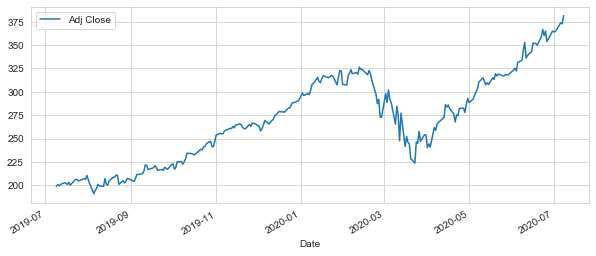

In [23]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

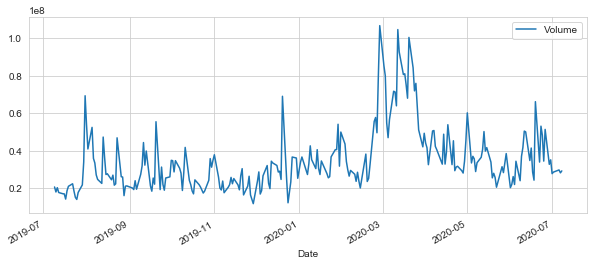

In [24]:
AAPL['Volume'].plot(legend=True, figsize = (10,4))

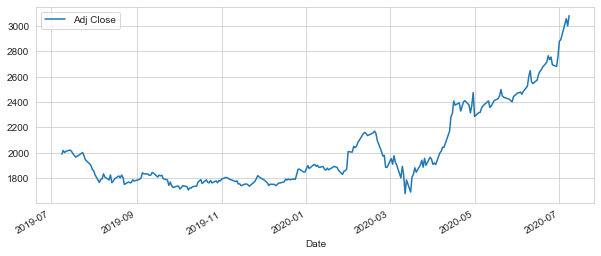

In [25]:
AMZN['Adj Close'].plot(legend=True, figsize=(10,4))

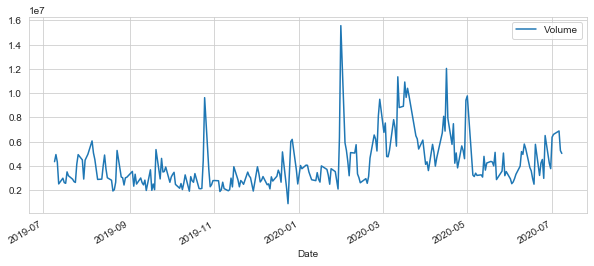

In [26]:
AMZN['Volume'].plot(legend=True, figsize = (10,4))

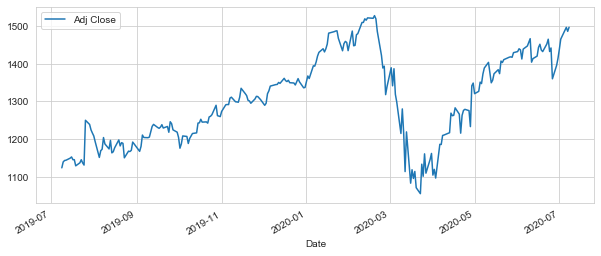

In [27]:
GOOG['Adj Close'].plot(legend=True, figsize=(10,4))

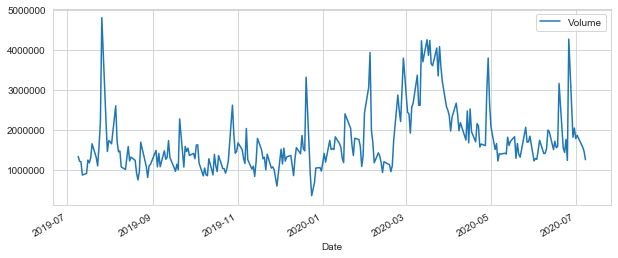

In [28]:
GOOG['Volume'].plot(legend=True, figsize = (10,4))

In [39]:
#moving average MA
ma_day = [10,20,50]

for ma in ma_day:
    column_name = (f'MA for {str(ma)} days') 
    AAPL[column_name] = pd.Series.rolling(AAPL['Adj Close'],ma).mean()

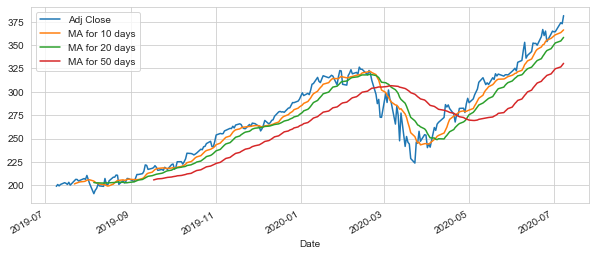

In [41]:
AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

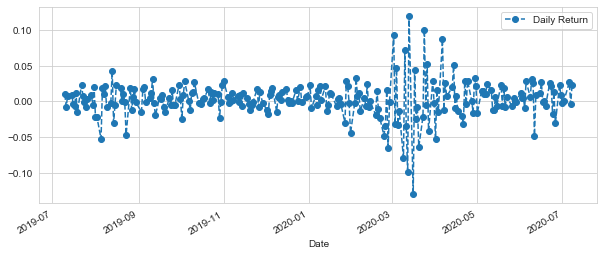

In [44]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

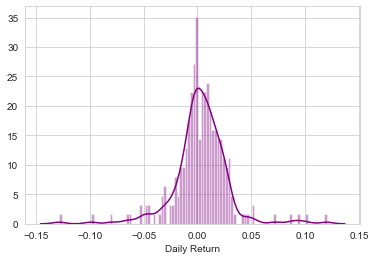

In [45]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

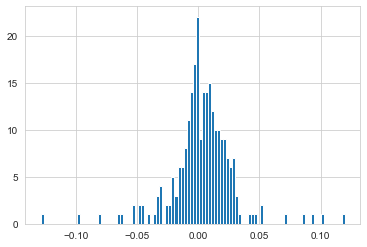

In [46]:
AAPL['Daily Return'].hist(bins=100)

In [47]:
#pravimo novi dataframe, za sve kompanije iz liste sa pocetka uzimamo Adj Closing price
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [48]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-09,198.866638,1124.829956,134.801239,1988.300049
2019-07-10,200.833160,1140.479980,136.174347,2017.410034
2019-07-11,199.370621,1144.209961,136.717636,2001.069946
2019-07-12,200.902344,1144.900024,137.211563,2011.000000
2019-07-15,202.789810,1150.339966,137.211563,2020.989990


In [49]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-09,NaN,NaN,NaN,NaN
2019-07-10,0.009889,0.013913,0.010186,0.014641
2019-07-11,-0.007282,0.003271,0.003990,-0.008100
2019-07-12,0.007683,0.000603,0.003613,0.004962
2019-07-15,0.009395,0.004751,0.000000,0.004968


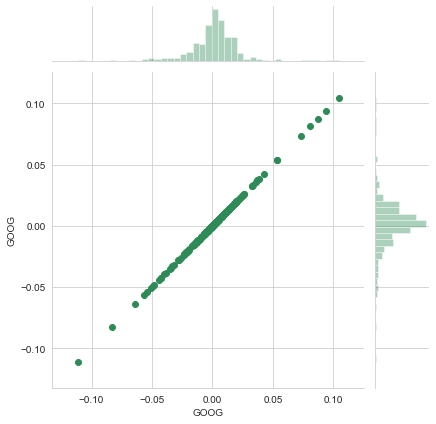

In [52]:
#pravimo korelaciju Googlovih akcija sa samim sobom, ocekujemo linearnu povezanost
sns.jointplot('GOOG','GOOG',tech_rets, kind='scatter', color='seagreen')

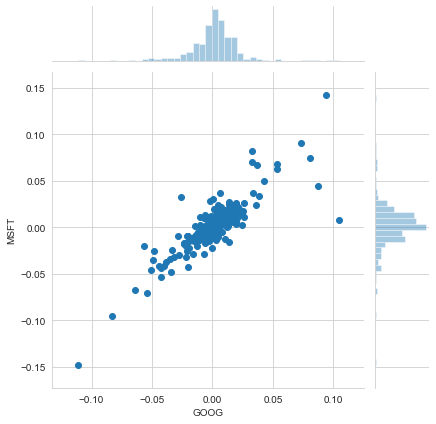

In [58]:
sns.jointplot('GOOG','MSFT',tech_rets, kind='scatter')

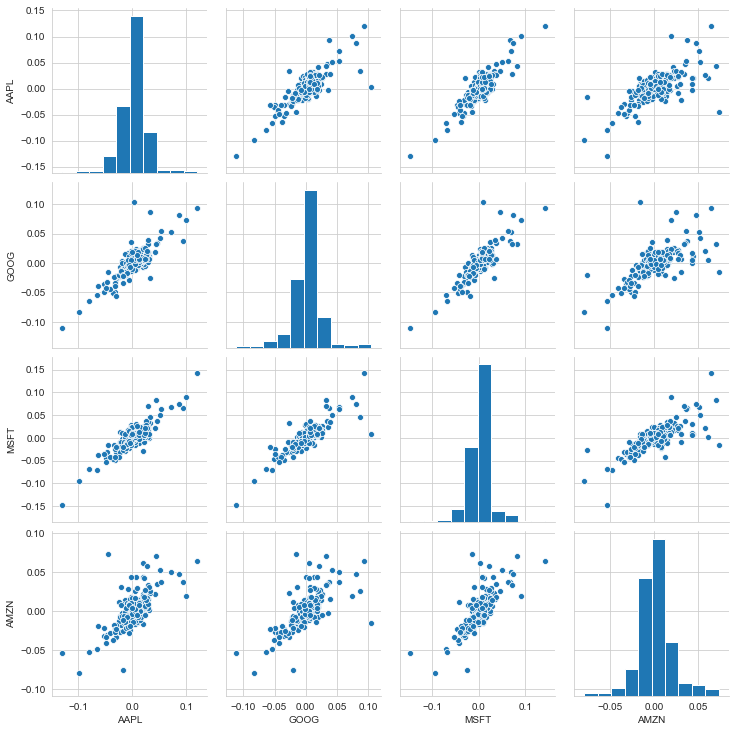

In [59]:
sns.pairplot(tech_rets.dropna())

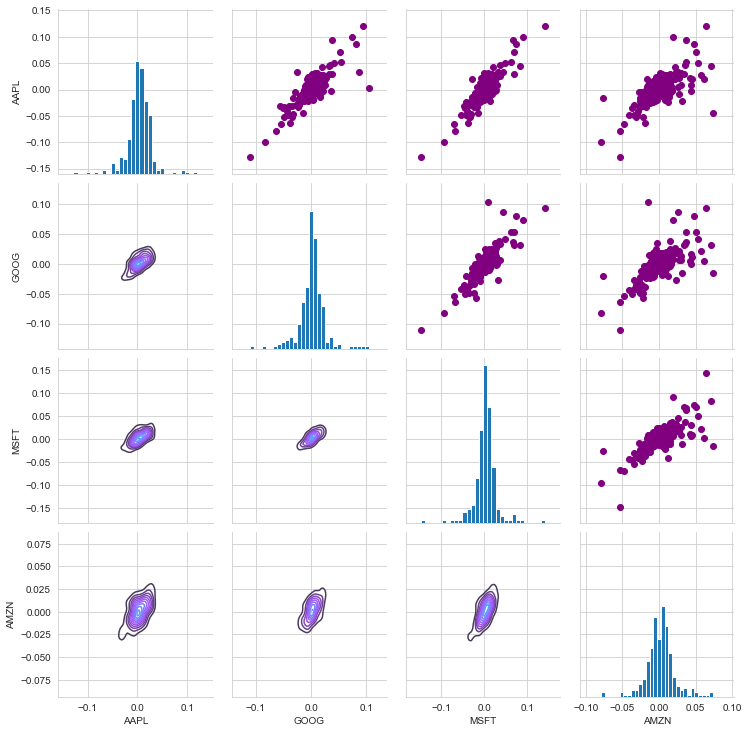

In [60]:
returns_fig = sns.PairGrid(tech_rets.dropna())

#gornji trougao kako da izgeda map_upper
returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

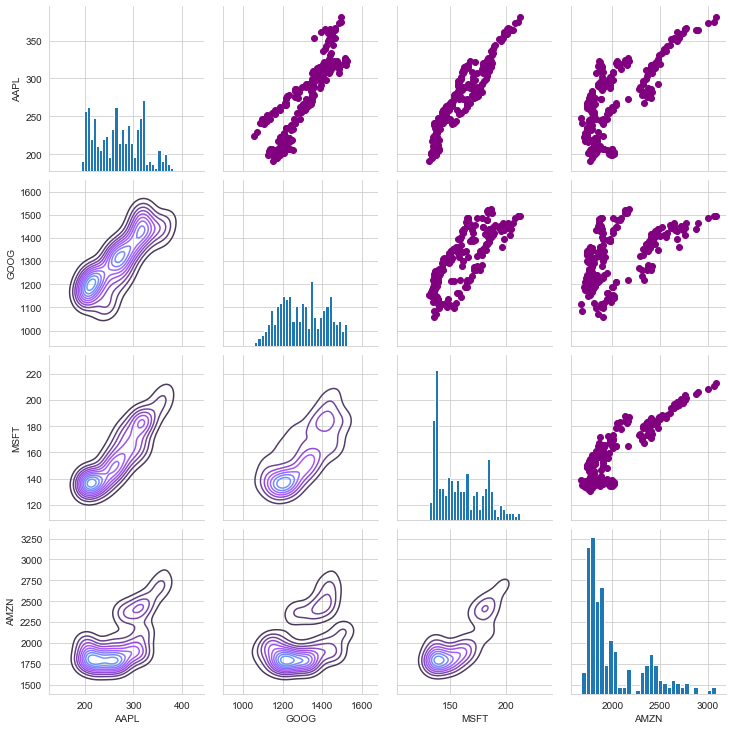

In [61]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

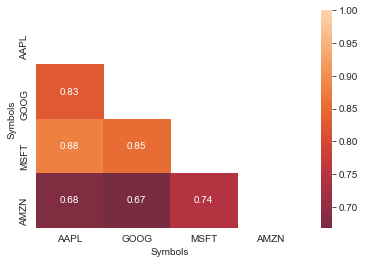

In [76]:
#corrplot() ne postoji, pa koristimo heatmap(), medjutim potrebne su modifikacije
#prve dve linije koda izbacuju gornji desni trougao podataka radi lakseg citanja koorelacije
mask = np.zeros_like(tech_rets.dropna().corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(tech_rets.dropna().corr(),mask=mask, center=0.5, annot=True)


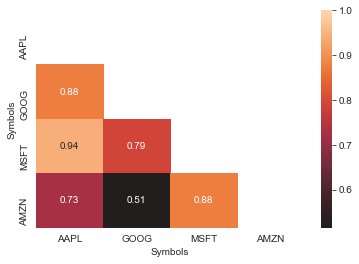

In [79]:
mask = np.zeros_like(closing_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(closing_df.corr(),mask=mask, center=0.5, annot=True)

In [80]:
rets = tech_rets.dropna()

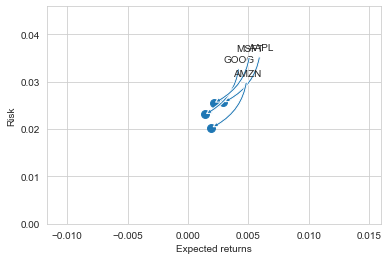

In [100]:
#velicina tacke u obliku kruga na grafiku
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = "simple", connectionstyle = "arc3,rad=-0.3")
                )
    
#resiti problem sa strelicama!!!
#pokazuje se kad stil stavim u arrowstyle = "fancy"
#arrowstyle = "simple" se vidi
#al se ne vide kad je arrowstyle = "-"

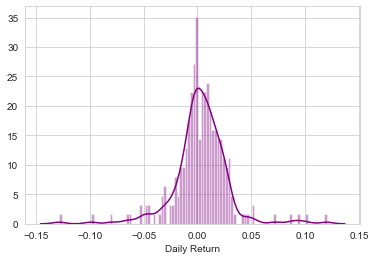

In [102]:
#Value at risk using the "bootstrap" method

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [103]:
#daily returns for your stock
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-10,0.009889,0.013913,0.010186,0.014641
2019-07-11,-0.007282,0.003271,0.003990,-0.008100
2019-07-12,0.007683,0.000603,0.003613,0.004962
2019-07-15,0.009395,0.004751,0.000000,0.004968
2019-07-16,-0.003460,0.002817,-0.013103,-0.005487


In [104]:
# 95% sigurni da je gubitak 3,4% novca na dnevnom nivou u najgorem slucaju
rets['AAPL'].quantile(0.05)

-0.03425838271082968

In [105]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [107]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [108]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-09,1128.025024,1107.170044,1111.800049,1124.829956,1330400,1124.829956
2019-07-10,1142.050049,1130.969971,1131.219971,1140.479980,1209500,1140.479980
2019-07-11,1153.069946,1139.579956,1143.250000,1144.209961,1195500,1144.209961
2019-07-12,1147.339966,1138.780029,1143.989990,1144.900024,864000,1144.900024
2019-07-15,1150.819946,1139.400024,1146.859985,1150.339966,903800,1150.339966


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

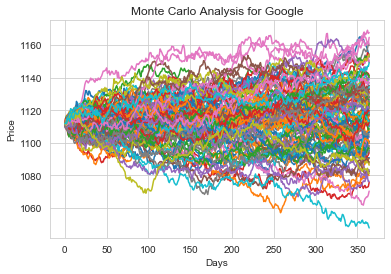

In [109]:
start_price = 1111.80
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [110]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365')

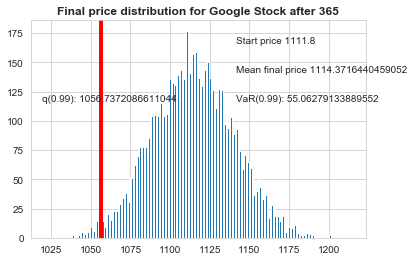

In [116]:
q = np.percentile(simulations,1)
plt.hist(simulations, bins=200)
plt.figtext(0.6,0.8, s=f'Start price {str(start_price)}')

plt.figtext(0.6,0.7, f'Mean final price {str(simulations.mean())}')

plt.figtext(0.6,0.6, f'VaR(0.99): {str(start_price-q)}')

plt.figtext(0.15,0.6, f'q(0.99): {str(q)}')

plt.axvline(x=q, linewidth=4, color='r')

plt.title(f'Final price distribution for Google Stock after {str(days)}' , weight='bold', )